In [1]:
%pylab inline
from sklearn.naive_bayes import GaussianNB
from distribuciones import paralelo, diagonal, espirales_anidadas
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from random import sample
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from random import sample
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import confusion_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# EJ 1

In [2]:
# resultados tp1

diag_1 = np.loadtxt('../tp2/ej4_diagonal.txt')
para_1 = np.loadtxt('../tp2/ej4_paralelo.txt')

# resultados tp2

diag_2 = np.loadtxt('../tp2/ej5_diagonal.txt')
para_2 = np.loadtxt('../tp2/ej5_paralelo.txt')

In [3]:
C = 0.78
ntrain = 250
ntest  = 10000
dimension = [2,4,8,16,32]

In [4]:
test_error_d = []
train_error_d = []
    
for d in dimension:

    accuracy_max = -99
      
    for i in range(20):
        
        dtrain = diagonal(d,ntrain,C)
        y_d = dtrain['clases'].values
        X_d = dtrain.drop(['clases'],axis = 1).values
    
        clf = GaussianNB()
        clf.fit(X_d, y_d)
        
        prediccion_training = clf.predict(X_d)
        correctos, = np.where(prediccion_training == y_d)
        accuracy = len(correctos)/len(y_d)
        
        if accuracy > accuracy_max:
            accuracy_max = accuracy
            bclf = clf
    
    dtest = diagonal(d,ntest,C)
    y = dtest['clases'].values
    X = dtest.drop(['clases'],axis = 1).values
    prediccion_training = bclf.predict(X)
    correctos, = np.where(prediccion_training == y)
    accuracy = len(correctos)/len(y)
    
    test_error_d.append(1 - accuracy)
    train_error_d.append(1 - accuracy_max)

In [5]:
test_error_p = []
train_error_p = []
    
for d in dimension:

    accuracy_max = -99
      
    for i in range(20):
        
        dtrain = diagonal(d,ntrain,C)
        y_d = dtrain['clases'].values
        X_d = dtrain.drop(['clases'],axis = 1).values
    
        clf = GaussianNB()
        clf.fit(X_d, y_d)
        
        prediccion_training = clf.predict(X_d)
        correctos, = np.where(prediccion_training == y_d)
        accuracy = len(correctos)/len(y_d)
        
        if accuracy > accuracy_max:
            accuracy_max = accuracy
            bclf = clf
    
    dtest = diagonal(d,ntest,C)
    y = dtest['clases'].values
    X = dtest.drop(['clases'],axis = 1).values
    prediccion_training = bclf.predict(X)
    correctos, = np.where(prediccion_training == y)
    accuracy = len(correctos)/len(y)
    
    test_error_p.append(1 - accuracy)
    train_error_p.append(1 - accuracy_max)

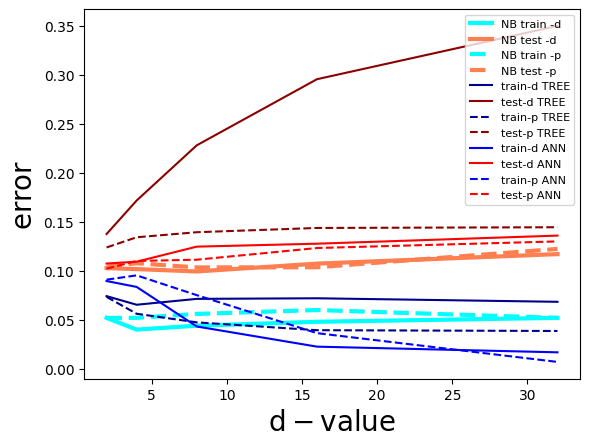

In [6]:
D_values = dimension

plt.plot(dimension,train_error_d,label='NB train -d',color='cyan',lw=3)
plt.plot(dimension,test_error_d,label='NB test -d',color='coral',lw=3)
plt.plot(dimension,train_error_p,label='NB train -p',ls='--',color='cyan',lw=3)
plt.plot(dimension,test_error_p,label='NB test -p',ls='--',color='coral',lw=3)


plt.plot(D_values,diag_1[:,1],label='train-d TREE',color='darkblue')
plt.plot(D_values,diag_1[:,2],label='test-d TREE',color='darkred')
plt.plot(D_values,para_1[:,1],label='train-p TREE',color='darkblue',ls='--')
plt.plot(D_values,para_1[:,2],label='test-p TREE',color='darkred',ls='--')

plt.plot(D_values,diag_2[:,1],label='train-d ANN',color='blue')
plt.plot(D_values,diag_2[:,2],label='test-d ANN',color='red')
plt.plot(D_values,para_2[:,1],label='train-p ANN',color='blue',ls='--')
plt.plot(D_values,para_2[:,2],label='test-p ANN',color='red',ls='--')

plt.xlabel('$\\rm d-value$',size=20)
plt.ylabel('$\\rm error$',size=20)


plt.legend(fontsize=8)

Se observa que este clasificador es muy bueno para clasificar tanto el problema paralelo como el diagonal. Si bien para grandes dimension las redes neuronales andan un poco mejor, el clasificador Naiva Bayes que modela las clases como gauseanas anda correctamente y es muy estable para todas las dimensiones. De alguna manera es esperable que este clasificador ande bien en este problema ya que justamente queremos clasificar gausianas utilizando este clasificador que es en base a asignar probabilidades con gaussianas. No parece haber una diferencia entre el caso diagonal y paralelo, lo cual tambien es razonable, ya que estando en diagonal o paralelo, no dejan de ser gauseanas. 

# EJ 2

In [5]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,0]
y = df.iloc[:,1]
clase = df.iloc[:,2]

# conjunto de entrenamiento
ndata = 500
seleccion = sample(list(np.arange(len(x))),ndata)
xdata = df.iloc[seleccion,:2]
ydata = df.iloc[seleccion,2]

# conjunto de test

df_test = pd.read_csv('../tp2/dos_elipses.test')
df_test.columns = ['x','y','clase']

xtest = df_test.iloc[:,:2]
ctest = df_test.iloc[:,2]

In [6]:
clf = GaussianNB()
clf.fit(xdata, ydata)
prediccion_training = clf.predict(xdata)
correctos, = np.where(prediccion_training == ydata)
print('accuracy',len(correctos)/len(ydata))

accuracy 0.742


0.7488744372186094
1513 486


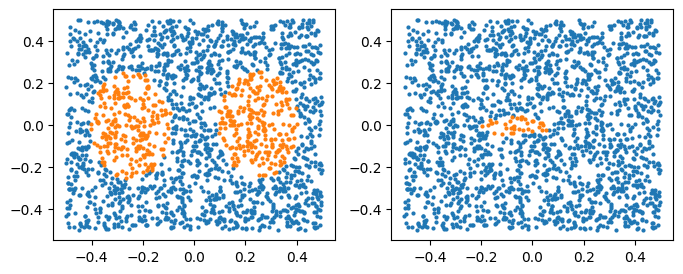

In [7]:
prediccion_test = clf.predict(xtest)
correctos, = np.where(prediccion_test == ctest)
print(len(correctos)/len(ctest))

x = xtest.iloc[:,0]
y = xtest.iloc[:,1]
clase = ctest

c0, = np.where(clase==0)
c1, = np.where(clase==1)
print(len(c0),len(c1))
plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

plt.subplot(122)

clase = prediccion_test
c0, = np.where(clase==0)
c1, = np.where(clase==1)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

Para este problema claramente el clasificador anda mal. Se me ocurre que como ambas clases tienen la misma media ~(0,0) lo que termina definiendo la clasificacion son los prior, y tanto para x>0 o x<0 hay mas cantidad de puntos azules que amarillos, entonces se termina clasificando casi todo como azul. (Muchas veces me clasifico todo azul, y algunas veces casi todo azul y una pequeña seccion del centro como amarillo).

In [8]:
df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
ydata = df['clases']
xdata = df.drop(['clases'],axis = 1)

clf = GaussianNB()
clf.fit(xdata, ydata)
prediccion_training = clf.predict(xdata)
correctos, = np.where(prediccion_training == ydata)
print('accuracy',len(correctos)/len(ydata))

df = espirales_anidadas(2000).drop(['r','tita'],axis=1)
ytest = df['clases']
xtest = df.drop(['clases'],axis = 1)


prediccion_test = clf.predict(xtest)
correctos, = np.where(prediccion_test == ytest)
print('accuracy',len(correctos)/len(ytest))

accuracy 0.592
accuracy 0.572


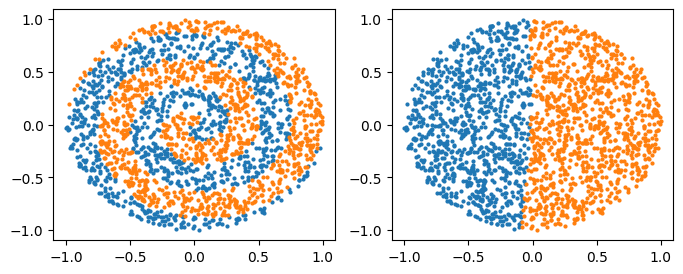

In [9]:
x = xtest.iloc[:,0]
y = xtest.iloc[:,1]
clase = ytest

c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

plt.subplot(122)

clase = prediccion_test
c0, = np.where(clase==0)
c1, = np.where(clase==1)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

Para este problema de nuevo vemos que el clasificador anda mal. Al igual que el caso anterior, creo que como las dos clases comparten la misma media ~(0,0) entonces la dist de prob son dos gausianas centradas en el mismo punto, (y asi a ojo quizas similar desviacion estandar ?), pero creo que lo que termina definiendo a la hora de clasificar son n los prior, que en el caso de la clase amarilla, la region de la derecha tiene mas cantidad de puntos amarillos que la clase azul, y por eso termina clasificando todo como amarillo, y al revez en la region izquierda. 

# EJ 3

In [18]:
def NBfunction(bines,x_train,y_train,x_val,y_val,x_test,y_test):
    
    error_train = []; error_val = []; error_test = []
    
    for bins in bines:
        best_bins = -99
        best_accuracy = -99
    # convierto variables
    
        discretizador = KBinsDiscretizer(n_bins = bins, encode='ordinal',strategy='uniform')
        discretizador.fit(x_train)
        x_train_disc = discretizador.transform(x_train)
        x_val_disc   = discretizador.transform(x_val)
        x_test_disc  = discretizador.transform(x_test)
    
    # entreno el clasificador
    
        clf = CategoricalNB(min_categories=bins)
        clf.fit(x_train_disc,y_train)
        
    # compruebo error
    
        prediccion_training = clf.predict(x_train_disc)
        correctos, = np.where(prediccion_training == y_train)
        accuracy_train = len(correctos)/len(y_train)
        
        prediccion_validation = clf.predict(x_val_disc)
        correctos, = np.where(prediccion_validation == y_val)
        accuracy_val = len(correctos)/len(y_val)
        
        prediccion_test = clf.predict(x_test_disc)
        correctos, = np.where(prediccion_test == y_test)
        accuracy_test = len(correctos)/len(y_test)
        
        if accuracy_train > best_accuracy:
            best_accuracy = accuracy_train
            best_discretizador = discretizador
            best_clf = clf
            best_bins = bins
            
        error_train.append(1-accuracy_train)
        error_val.append(1-accuracy_val)
        error_test.append(1-accuracy_test)
        
    return error_train, error_val, error_test, best_clf, best_bins, best_discretizador

# EJ 4

## Dos Elipses

In [19]:
df = pd.read_csv('../tp2/dos_elipses.data')
df.columns = ['x','y','clase']

x = df.iloc[:,0]
y = df.iloc[:,1]
clase = df.iloc[:,2]


ndata = 500
ntrain = 400
nvalid = 100
ntest = 2000

# selecciono 500 datos para trabajar

seleccion = sample(list(np.arange(len(x))),ndata)
xdata = x[seleccion]
ydata = y[seleccion]

# separo en train y validation

train_mask = sample(list(np.arange(ndata)),ntrain)
valid_mask = np.delete(np.arange(ndata),train_mask)

r_train = df.iloc[train_mask,:2]
c_train = df.iloc[train_mask,2]

r_valid = df.iloc[valid_mask,:2]
c_valid = df.iloc[valid_mask,2]

df_test = pd.read_csv('../tp2/dos_elipses.test')
df_test.columns = ['x','y','clase']

r_test = df_test.iloc[:,:2]
c_test = df_test.iloc[:,2]

In [20]:
bines = np.arange(2,200)

error_train, error_val, error_test, best_clf, best_bins, best_discretizador = NBfunction(bines,r_train,c_train,r_valid,c_valid,r_test,c_test)

Text(0.5, 0, 'bines')

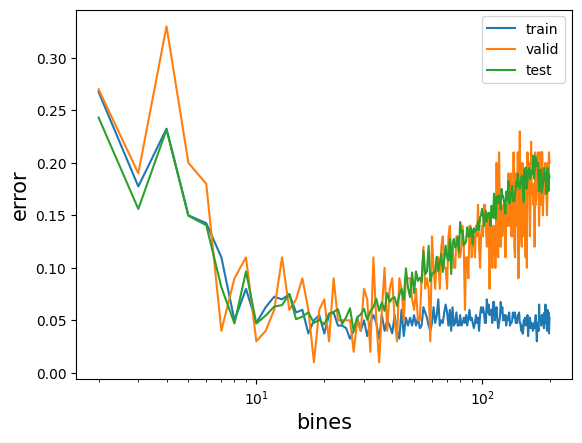

In [21]:
plt.plot(bines,error_train,label='train')
plt.plot(bines,error_val,label='valid')
plt.plot(bines,error_test,label='test')
plt.legend()
plt.semilogx()
plt.ylabel('error',size=15)
plt.xlabel('bines',size=15)

Ahora ya no estoy clasificando con gausianas sino que lo estoy haciendo con categorialNB que utiliza la distribucion multinomial que da la probabilidad de obtener ciertos resultados (exito, fracaso o mas) en una serie de ensayos. Entonces ahora tendremos los "exitos" en un rango de valores discretos centrados en las espirales, y por eso el clasificador anda razonablemente bien. Se ve que el bineado optimo es alrededor de los 20 bines, y que para mas cantidad de bines empezamos a tener sobreajuste de los datos. 

1513 486


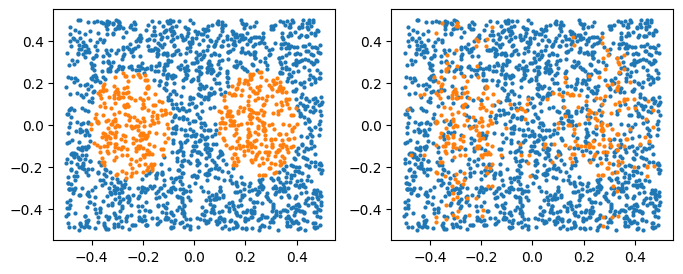

In [22]:
x_test_disc  = best_discretizador.transform(r_test)

prediccion_test = best_clf.predict(x_test_disc)
correctos, = np.where(prediccion_test == c_test)
accuracy_test = len(correctos)/len(c_test)

x = r_test.iloc[:,0]
y = r_test.iloc[:,1]
clase = c_test

c0, = np.where(clase==0)
c1, = np.where(clase==1)
print(len(c0),len(c1))
plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

plt.subplot(122)

clase = prediccion_test
c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

## Espirales Anidadas

In [23]:
ndata = 400
nvalid = 100
ntest = 2000

df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
ydata = df['clases']
xdata = df.drop(['clases'],axis = 1)

df = espirales_anidadas(nvalid).drop(['r','tita'],axis=1)
yval = df['clases']
xval = df.drop(['clases'],axis = 1)

df = espirales_anidadas(ntest).drop(['r','tita'],axis=1)
ytest = df['clases']
xtest = df.drop(['clases'],axis = 1)

error_train, error_val, error_test, best_clf, best_bins, best_discretizador = NBfunction(bines,xdata,ydata,xval,yval,xtest,ytest)

In [24]:
plt.plot(bines,error_train,label='train')
plt.plot(bines,error_val,label='valid')
plt.plot(bines,error_test,label='test')
plt.legend()
plt.semilogx()
plt.ylabel('error',size=15)
plt.xlabel('bines',size=15)

Text(0.5, 0, 'bines')

Para este problema claramente los resultados no son buenos. Para mas de 20 bines comenzamos a ver un fuerte sobreajuste y para el conjunto de test y validacion el clasificador comienza a tener hacia errores del 50 % lo cual indica que el clasificador tiende a ser aleatorio. En el mejor de los casos se consigue un error de 40 % para el conjunto de test/validacion lo cual en principio es bastante pobre.

1033 967


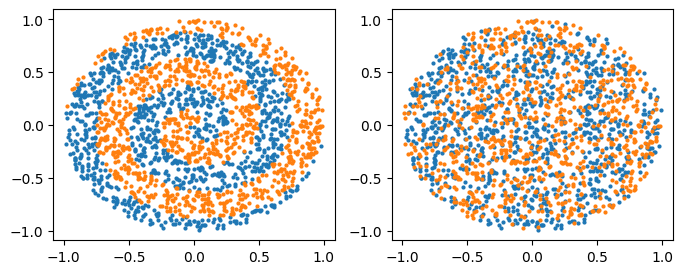

In [25]:
x_test_disc  = best_discretizador.transform(xtest)

prediccion_test = best_clf.predict(x_test_disc)
correctos, = np.where(prediccion_test == ytest)
accuracy_test = len(correctos)/len(ytest)

x = xtest.iloc[:,0]
y = xtest.iloc[:,1]
clase = ytest

c0, = np.where(clase==0)
c1, = np.where(clase==1)
print(len(c0),len(c1))
plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

plt.subplot(122)

clase = prediccion_test
c0, = np.where(clase==0)
c1, = np.where(clase==1)

plt.plot(x[c0],y[c0],ls='none',marker='o',markersize=2)
plt.plot(x[c1],y[c1],ls='none',marker='o',markersize=2)

# Ej 5

In [26]:
X, y = fetch_20newsgroups(subset="train",return_X_y=True, remove=["headers"])
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.25, random_state=1)
X_test, y_test = fetch_20newsgroups(subset="test",return_X_y=True,remove=["headers"])

alpha = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
ldic  = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

alpha = [0.0001,0.001,0.01,0.1,1]
ldic  = [1000, 2000, 3000, 4000]

In [27]:
%%time

error_train = np.zeros([len(ldic),len(alpha)])
error_valid = np.zeros([len(ldic),len(alpha)])
error_tests = np.zeros([len(ldic),len(alpha)])

best_accuracy = -99
i = 0
for largo_diccionario in ldic:

    print(largo_diccionario)
    
    vec = CountVectorizer(stop_words='english',max_features=largo_diccionario)
    Xvec_train = vec.fit_transform(X_train).toarray()
    Xvec_test = vec.transform(X_test).toarray()
    Xvec_val = vec.transform(X_val).toarray()
    
    j = 0
    for alfa in alpha:
            clf = MultinomialNB(alpha=alfa)
            clf.fit(Xvec_train, y_train)
            
            prediccion_training = clf.predict(Xvec_train)
            correctos, = np.where(prediccion_training == y_train)
            accuracy_train = len(correctos)/len(y_train)
        
            prediccion_validation = clf.predict(Xvec_val)
            correctos, = np.where(prediccion_validation == y_val)
            accuracy_val = len(correctos)/len(y_val)
        
            prediccion_test = clf.predict(Xvec_test)
            correctos, = np.where(prediccion_test == y_test)
            accuracy_test = len(correctos)/len(y_test)
        
            error_train[i,j] = 1 - accuracy_train
            error_valid[i,j] = 1 - accuracy_val
            error_tests[i,j] = 1 - accuracy_test
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_clf = clf
                best_alpha = alfa
                best_ldic = largo_diccionario
            
                
            j = j + 1
                
    i = i + 1

print(best_accuracy, best_alpha, best_ldic)

1000
2000
3000
4000
0.767762460233298 0.1 4000
CPU times: user 1min 52s, sys: 19.6 s, total: 2min 12s
Wall time: 1min 23s


In [28]:
vec = CountVectorizer(stop_words='english',max_features=best_ldic)
Xvec_train = vec.fit_transform(X_train).toarray()
Xvec_test = vec.transform(X_test).toarray()
prediccion_test = best_clf.predict(Xvec_test)
correctos, = np.where(prediccion_test == y_test)
accuracy_test = len(correctos)/len(y_test)

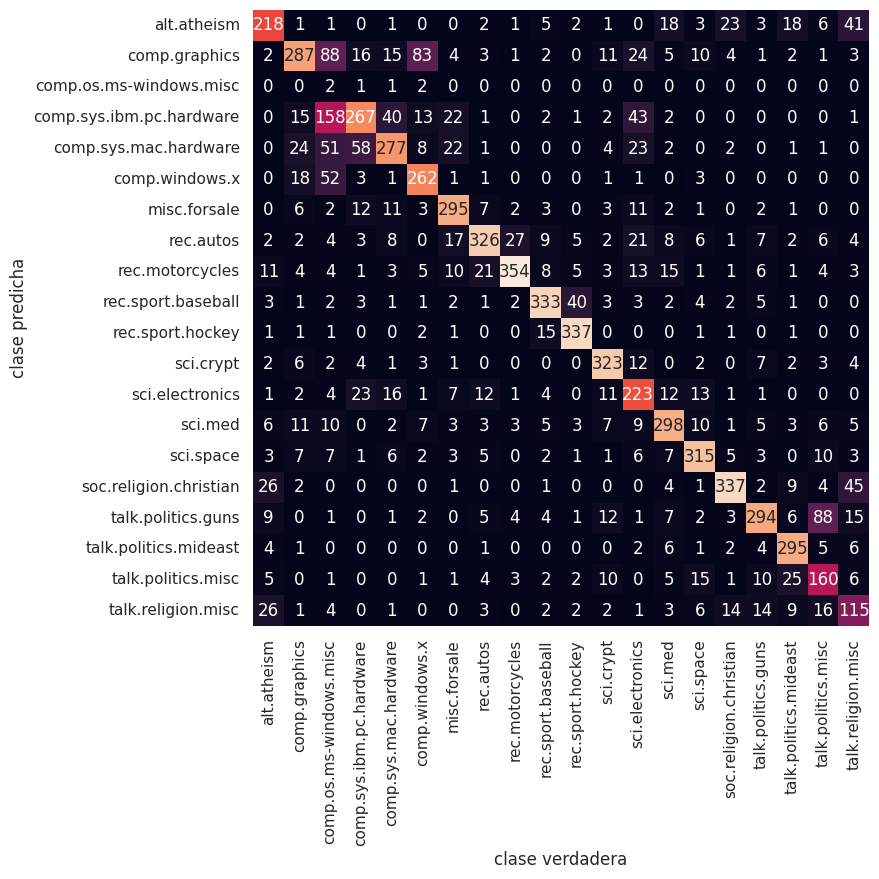

In [30]:
sns.set()

plt.figure(figsize=(8,8))
test = fetch_20newsgroups(subset="test")
mat = confusion_matrix(test.target, prediccion_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=test.target_names, yticklabels=test.target_names)
plt.xlabel('clase verdadera')
plt.ylabel('clase predicha');

Los valores se centran en general en la diagonal principal, lo cual es una buena señal para el clasificador. Es extraño que ningun valor de "windows.misc" fue clasificado correctamente. 

Se puede observar que el clasificador confunde mucho los textos que son de tematicas similares, lo cual es esperable. Ejemplos de esto son -religion, cristianismo y ateismo-, -politica.guns y politica.mins- o -hardware y electronica-.

Estas confusiones se deben a que los textos deben compartir palabras similares, e imagino que en realidad es buena señal que las confusiones del clasificador se produzcan en textos de tematicas en principio similares y no en textos de tematicas completamente diferentes. 